In [1]:
# Week 6: Probability and Statistical Testing
# Theory: Study probability distributions (normal, Poisson), hypothesis testing (ttest, chi-squared), and confidence intervals.
# Hands-On: Perform hypothesis testing using SciPy, simulate probability distributions with NumPy.
# Client Project: Perform statistical analysis for comparing two business strategies (e.g., t-test).

**Probability and Statistical Testing**

- Probability: The chance of something happening. 
- (Example: Probability of getting a head when tossing a coin is 0.5 or 50%).

- Statistical Testing: A method to check if the results we see in data are real or just happened by chance.

**1. Theory: Study probability distributions (normal, Poisson), hypothesis testing (ttest, chi-squared), and confidence intervals.**

**Probability Distributions**
- A probability distribution tells us how probabilities are spread across values of a random variable.

**(a) Normal Distribution**
- The normal distribution is a continuous probability distribution that is symmetrical and bell-shaped.
- Most data in nature (heights, weights, test scores, IQ scores) follows it.
- It is defined by two parameters:
- Mean (μ): Center of the distribution.
- Standard deviation (σ): Spread of the data.
  
**Empirical Rule (68-95-99.7 Rule)**

- About 68% of data falls within 1σ of mean.
- About 95% within 2σ.
- About 99.7% within 3σ.
- Example: If heights are normally distributed with μ = 170 cm, σ = 10 cm:
- 68% of people are between 160–180 cm.
- 95% between 150–190 cm.
- 99.7% between 140–200 cm.

**(b)Poisson Distribution**

- The Poisson distribution is a discrete probability distribution that models the number of times an event happens in a fixed interval of time or space.
- Events occur independently.
- Events occur at a constant average rate (λ).
- Two events cannot happen at the exact same instant.

**Properties**

- Mean = λ
- Variance = λ
- Only takes non-negative integers (0, 1, 2, …).

**Examples**

- Number of emails you receive in an hour (λ = 10 per hour).
- Number of typing errors on one page (λ = 2).
- Number of accidents at a crossing per day.

**Applications of Poisson Distribution**

- Telecommunications: Number of phone calls received.
- Traffic flow: Number of cars passing a toll booth.
- Biology: Number of mutations in a DNA strand.
- Banking: Number of customers arriving at ATM per hour.

**Hypothesis Testing**

- A statistical method used to decide whether the results from a sample provide enough evidence to support or reject a claim (assumption) about a population.

**Example**

- A company claims that the average battery life of their phones is 10 hours.
- You test 30 phones and find the average = 9.5 hours, with some variation.

- Question: Is this difference real, or just due to chance?
- Steps:
- H₀: μ = 10 hours
- H₁: μ ≠ 10 hours
- Perform a t-test → Suppose p = 0.03
- Since p < 0.05, we reject H₀ → Claim is not true, battery life is significantly less than 10 hours.

**(a)t test**
- A t-test is a statistical test used to compare the means of one or two groups to see if they are significantly different from each other.
- It is used when:
- Sample size is small (< 30).
- Population standard deviation is unknown.

**Types of t-tests**

- One-Sample t-test

    - Compares the sample mean with a known or hypothesized population mean.
    
    - Example: A factory claims the average battery life is 10 hours. You test 20 batteries → Is the average really 10?

- Independent Two-Sample t-test

    - Compares means of two independent groups.
    
    - Example: Do male and female students have different average exam scores?

- Paired t-test

    - Compares means of the same group before and after treatment.
    
    - Example: Measure patients’ blood pressure before and after taking medicine.

**(b)chi-squared**
- The Chi-Squared test is a statistical test used to see if there is a significant relationship between categorical variables, or if the observed data fits the expected data.

**Types of Chi-Squared Tests**

- Chi-Square Test of Independence

    - Checks if two categorical variables are related.
    - Example: Is gender (male/female) related to voting preference (party A/B)?

- Chi-Square Goodness of Fit Test

    - Checks if observed data matches expected distribution.
    - Example: If a die is fair, each face should appear 1/6 of the time.

**Confidence Intervals**
- A confidence interval is a range of values, calculated from sample data.
- That is likely to contain the true population parameter (like mean or proportion) with a certain level of confidence.
- Example: “We are 95% confident that the average height of students is between 160 cm and 170 cm.”

**Confidence Level**

- 95% CI → Means if we repeated sampling 100 times, about 95 of the CIs would contain the true mean.
- Common choices: 90%, 95%, 99%.

- The confidence level (90%, 95%, 99%) represents how sure we are that the interval contains the true value. 
- For example, if the sample mean = 50, standard deviation = 10, n = 25, then the 95% CI is (46.08, 53.92).
- Interpretation: We are 95% confident that the true population mean lies within this interval.
- Confidence intervals are widely used in surveys, polls, and scientific research to provide estimates with uncertainty.

**2. Hands-On: Perform hypothesis testing using SciPy, simulate probability distributions with NumPy.**

In [3]:
# If needed (usually in a new environment):
# pip install numpy scipy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Reproducibility so your numbers match each run
rng = np.random.default_rng(42)
rng

Generator(PCG64) at 0x1F9B339ECE0

**Simulate a Normal distribution (NumPy)**

- Goal: Create synthetic data that follows a bell curve (Normal(μ=50, σ=10)).
- What to look for: A smooth, symmetric histogram centered near 50.

Normal: mean≈49.45, std≈10.02


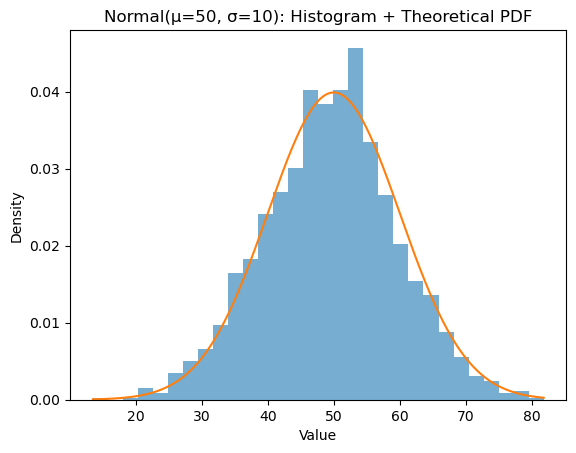

In [4]:
# PARAMETERS
mu, sigma, n = 50, 10, 2000

# SIMULATE
normal_data = rng.normal(loc=mu, scale=sigma, size=n)

# QUICK STATS
print(f"Normal: mean≈{normal_data.mean():.2f}, std≈{normal_data.std(ddof=1):.2f}")

# PLOT (one plot, no custom colors)
plt.figure()
plt.hist(normal_data, bins=30, density=True, alpha=0.6)
xs = np.linspace(normal_data.min(), normal_data.max(), 400)
plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sigma))
plt.title("Normal(μ=50, σ=10): Histogram + Theoretical PDF")
plt.xlabel("Value"); plt.ylabel("Density")
plt.show()

**Simulate a Poisson distribution (NumPy)**

- Goal: Create count data with average rate λ=5.
- What to look for: Bar plot with most mass around 5; mean ≈ variance ≈ λ.

Poisson: mean≈4.95, var≈5.10


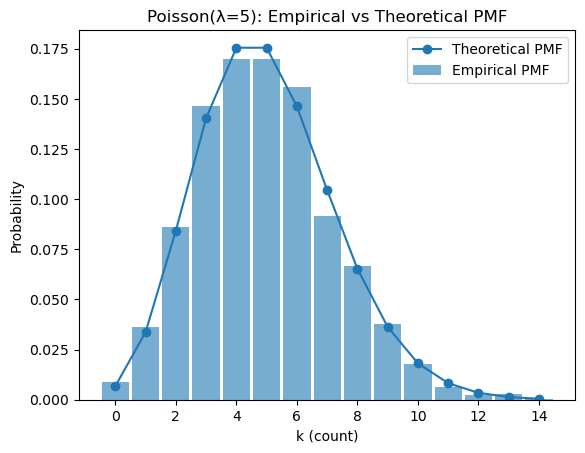

In [5]:
# PARAMETERS
lam, n_pois = 5, 2000

# SIMULATE
poisson_data = rng.poisson(lam=lam, size=n_pois)

# QUICK STATS
print(f"Poisson: mean≈{poisson_data.mean():.2f}, var≈{poisson_data.var(ddof=1):.2f}")

# EMPIRICAL PMF vs THEORETICAL PMF
vals, counts = np.unique(poisson_data, return_counts=True)
emp_pmf = counts / n_pois
k = np.arange(vals.min(), vals.max()+1)

plt.figure()
plt.bar(vals, emp_pmf, width=0.9, alpha=0.6, label="Empirical PMF")
plt.plot(k, stats.poisson.pmf(k, mu=lam), marker='o', label="Theoretical PMF")
plt.title("Poisson(λ=5): Empirical vs Theoretical PMF")
plt.xlabel("k (count)"); plt.ylabel("Probability")
plt.legend()
plt.show()

**One-sample t-test (SciPy)**

- Question: Is the mean of normal_data equal to 50?
- Hypotheses:
- H₀: μ = 50
- H₁: μ ≠ 50
- Decision rule: p < 0.05 ⇒ reject H₀ (significant difference).

In [6]:
t_stat, p_val = stats.ttest_1samp(normal_data, popmean=50)
print(f"One-sample t-test vs 50: t={t_stat:.3f}, p={p_val:.4f}")
print("Decision:", "Reject H0" if p_val < 0.05 else "Fail to reject H0")

One-sample t-test vs 50: t=-2.461, p=0.0140
Decision: Reject H0


**Two-sample (Welch) t-test (SciPy)**

- Question: Do two groups have different means?
- Hypotheses:
    - H₀: μ₁ = μ₂

    - H₁: μ₁ ≠ μ₂

In [7]:
# SIMULATE TWO GROUPS (different means)
groupA = rng.normal(loc=75, scale=10, size=40)
groupB = rng.normal(loc=80, scale=12, size=45)

t_stat, p_val = stats.ttest_ind(groupA, groupB, equal_var=False)  # Welch's t-test
print(f"Welch two-sample t-test: t={t_stat:.3f}, p={p_val:.4f}")
print("Decision:", "Reject H0" if p_val < 0.05 else "Fail to reject H0")

Welch two-sample t-test: t=-2.761, p=0.0072
Decision: Reject H0


**Chi-square goodness-of-fit (SciPy)**

- Question: Does observed categorical data match an expected distribution?
- Example: Fair die in 60 rolls (expected 10 each).

In [8]:
observed = np.array([10, 12, 8, 11, 9, 10])
expected = np.full(6, 10)

chi2, p_val = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-square GOF (fair die): χ²={chi2:.3f}, p={p_val:.4f}")
print("Decision:", "Reject H0 (not fair)" if p_val < 0.05 else "Fail to reject H0 (no evidence of unfairness)")

Chi-square GOF (fair die): χ²=1.000, p=0.9626
Decision: Fail to reject H0 (no evidence of unfairness)


**Chi-square test of independence (SciPy)**

- Question: Are two categorical variables associated?
- Example: Campaign (A/B) vs Purchase (Yes/No).

In [9]:
# Contingency table:
# rows = Campaign A, Campaign B; columns = Yes, No
table = np.array([[30, 20],
                  [45, 15]])

chi2, p_val, dof, expected = stats.chi2_contingency(table, correction=False)
print(f"Chi-square Independence: χ²={chi2:.3f}, df={dof}, p={p_val:.4f}")
print("Expected counts:\n", np.round(expected, 2))
print("Decision:", "Reject H0 (association present)" if p_val < 0.05 else "Fail to reject H0 (no evidence of association)")

Chi-square Independence: χ²=2.829, df=1, p=0.0926
Expected counts:
 [[34.09 15.91]
 [40.91 19.09]]
Decision: Fail to reject H0 (no evidence of association)


**3. Client Project: Perform statistical analysis for comparing two business
strategies (e.g., t-test).**

**Import Packages**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

**load CSV**

In [26]:
# load csv
df = pd.read_csv(r"C:\Users\prati\OneDrive\Datafiles\test_data.csv")
df

,user_id,group,revenue
0,1,A,47.021
1,2,A,68.128
2,3,A,53.545
3,4,A,55.424
4,5,A,65.676
...,...,...,...
195,196,B,67.292
196,197,B,36.469
197,198,B,29.891
198,199,B,77.277


**Sanity checks**

In [30]:
# check the sanity
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isna().sum())

print("\nGroup counts:")
print(df["group"].value_counts())

# check duplicate user_ids
dupes = df["user_id"].duplicated().sum()
print(f"\nDuplicate user_id rows: {dupes}")

Shape: (200, 3)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  200 non-null    int64  
 1   group    200 non-null    object 
 2   revenue  200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB
None

Missing values per column:
user_id    0
group      0
revenue    0
dtype: int64

Group counts:
group
A    100
B    100
Name: count, dtype: int64

Duplicate user_id rows: 0


**Descriptive statistics by group**

In [32]:
desc = df.groupby("group")["revenue"].agg(
    mean="mean", median="median", std="std", count="count", min="min", max="max")
desc

,mean,median,std,count,min,max
group,,,,,,
A,50.407,50.361,10.077,100,22.380,75.384
B,55.452,55.762,13.100,100,13.968,86.962


**Visual comparison (boxplot)**

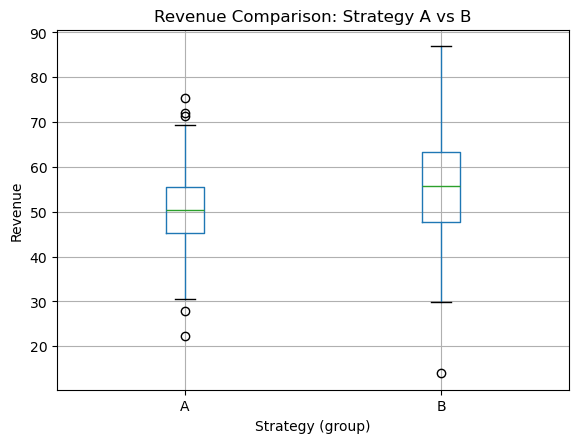

In [33]:
# box plot
df.boxplot(column="revenue", by="group")
plt.title("Revenue Comparison: Strategy A vs B")
plt.suptitle("")  # remove automatic subtitle
plt.xlabel("Strategy (group)")
plt.ylabel("Revenue")
plt.show()

**Assumption checks**
- Normality (per group)

In [34]:
# normality
group_a = df.loc[df["group"]=="A", "revenue"].values
group_b = df.loc[df["group"]=="B", "revenue"].values

shapiro_a = stats.shapiro(group_a)
shapiro_b = stats.shapiro(group_b)

print(f"Shapiro-Wilk A: stat={shapiro_a.statistic:.3f}, p={shapiro_a.pvalue:.4f}")
print(f"Shapiro-Wilk B: stat={shapiro_b.statistic:.3f}, p={shapiro_b.pvalue:.4f}")

Shapiro-Wilk A: stat=0.983, p=0.2458
Shapiro-Wilk B: stat=0.994, p=0.9497


- Equal variances (Levene’s test)

In [35]:
# equal variances
lev_stat, lev_p = stats.levene(group_a, group_b, center="median")
print(f"Levene's test: stat={lev_stat:.3f}, p={lev_p:.4f}")
use_equal_var = lev_p >= 0.05  # True if variances are not significantly different
use_equal_var

Levene's test: stat=6.519, p=0.0114


False

**Run the t-test**

In [37]:
# t-test (safe default): equal_var=False
t_stat, p_val = stats.ttest_ind(group_a, group_b, equal_var=False)
print(f"t = {t_stat:.3f}, p = {p_val:.6f}")

t = -3.052, p = 0.002604


**Effect size + 95% CI of mean difference**

In [38]:
# Mean difference (B - A)
mean_a, mean_b = np.mean(group_a), np.mean(group_b)
diff = mean_b - mean_a

# Standard errors for Welch CI
s1_sq = np.var(group_a, ddof=1)
s2_sq = np.var(group_b, ddof=1)
n1, n2  = len(group_a), len(group_b)
se_diff = np.sqrt(s1_sq/n1 + s2_sq/n2)

# Welch-Satterthwaite degrees of freedom
df_welch = (s1_sq/n1 + s2_sq/n2)**2 / ((s1_sq**2)/((n1**2)*(n1-1)) + (s2_sq**2)/((n2**2)*(n2-1)))

# 95% CI
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df_welch)
ci_low, ci_high = diff - t_crit*se_diff, diff + t_crit*se_diff

# Effect size: Cohen's d and Hedges' g
sp = np.sqrt(((n1-1)*s1_sq + (n2-1)*s2_sq) / (n1 + n2 - 2))   # pooled SD
cohens_d = diff / sp
J = 1 - 3 / (4*(n1 + n2) - 9)                                  # small-sample correction
hedges_g = cohens_d * J

print(f"Mean A = {mean_a:.3f}, Mean B = {mean_b:.3f}")
print(f"Mean difference (B - A) = {diff:.3f}")
print(f"95% CI for difference = [{ci_low:.3f}, {ci_high:.3f}]  (df≈{df_welch:.2f})")
print(f"Cohen's d = {cohens_d:.3f}, Hedges' g = {hedges_g:.3f}")

Mean A = 50.407, Mean B = 55.452
Mean difference (B - A) = 5.045
95% CI for difference = [1.784, 8.305]  (df≈185.78)
Cohen's d = 0.432, Hedges' g = 0.430


**Decision & business interpretation (auto-print)**

In [41]:
# Decision & business interpretation (auto-print)
alpha = 0.05
decision = "Reject H0 (significant difference)" if p_val < alpha else "Fail to reject H0 (no significant difference)"

print("---------- RESULT ----------")
print(f"Test: Welch's t-test (equal_var=False)")
print(f"t = {t_stat:.3f}, df ≈ {df_welch:.2f}, p = {p_val:.6f}")
print(f"Decision @ α={alpha}: {decision}")
print(f"Interpretation: On average, Strategy B is {diff:.2f} units "
      f"{'higher' if diff>0 else 'lower'} than Strategy A "
      f"[95% CI {ci_low:.2f} to {ci_high:.2f}].")
print(f"Effect size (Hedges' g): {hedges_g:.2f} "
      f"→ {'small' if abs(hedges_g)<0.5 else 'moderate' if abs(hedges_g)<0.8 else 'large'} practical impact.")

---------- RESULT ----------
Test: Welch's t-test (equal_var=False)
t = -3.052, df ≈ 185.78, p = 0.002604
Decision @ α=0.05: Reject H0 (significant difference)
Interpretation: On average, Strategy B is 5.04 units higher than Strategy A [95% CI 1.78 to 8.31].
Effect size (Hedges' g): 0.43 → small practical impact.
